### While there are several Python packages that are very useful in manipulating, visualizing, cleaning and modeling data, below some of the most popular and best maintained ones:
* Pandas (https://pandas.pydata.org/) | High-performance, easy-to-use data structures and data analysis tools
* Numpy (http://www.numpy.org/) | The fundamental package for scientific computing with Python
* Scipy (https://www.scipy.org/) | Ecosystem of open-source software for mathematics, science, and engineering
* Scikit-learn (http://scikit-learn.org) | Simple and efficient tools for data mining and data analysis
* Matplotlib (https://matplotlib.org/) | 2D plotting library which produces publication quality figures
* Plot.ly (https://plot.ly/) | Library for creating polished interactive plots
* Altair (https://altair-viz.github.io/) | Library for creating declarative interactive plots

# Pandas / Matplotlib / Plot.ly Demo

## U.S. Baby Names 1880-2015

The following datasets [(download here)](https://www.ssa.gov/oact/babynames/limits.html) contain a list of the most frequent names given to newborn babies in the United States each year. There are many things you can do with the dataset:

* Visualize the proportion of babies given a particular name (your own, or another name) over time.
* Determine the relative rank of a name.
* Determine the most popular names in each year or the names with largest increases or decreases.
* Analyze trends in names: vowels, consonants, length, overall diversity, changes in spelling, first and last letters.
* Analyze external sources of trends: biblical names, celebrities, demographic changes.

Modified from "Python for Data Analysis" by Wes McKinney.

Let's first open a single file and take a look at it:


In [1]:
%matplotlib inline

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Note that here we are loading a dataset from a web URL. Use TAB to see what else can be done with `read_csv()`.
path = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/baby-names/yob1880.txt'
df_names_1880 = pd.read_csv(path,  names=['name', 'sex', 'births'])

In [4]:
df_names_1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [5]:
df_names_1880.shape

(2000, 3)

In [6]:
df_names_1880.births.describe()

count    2000.000000
mean      100.741000
std       466.098278
min         5.000000
25%         7.000000
50%        13.000000
75%        41.250000
max      9655.000000
Name: births, dtype: float64

In [7]:
df_names_1880[df_names_1880.births == 9655]

,name,sex,births
942,John,M,9655


In [8]:
df_names_1880[df_names_1880.births == 5].head()

,name,sex,births
835,Adelle,F,5
836,Adina,F,5
837,Adrienne,F,5
838,Albertine,F,5
839,Alys,F,5


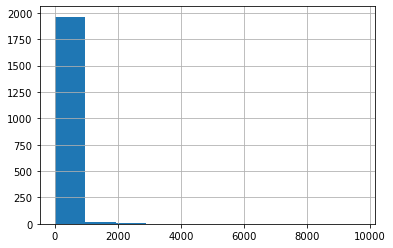

In [9]:
df_names_1880['births'].hist();

In [10]:
# There are several different plot styles you can use with matplotlib.
for style in plt.style.available:
    print(style)

Solarize_Light2
_classic_test_patch
bmh
classic
dark_background
fast
fivethirtyeight
ggplot
grayscale
seaborn
seaborn-bright
seaborn-colorblind
seaborn-dark
seaborn-dark-palette
seaborn-darkgrid
seaborn-deep
seaborn-muted
seaborn-notebook
seaborn-paper
seaborn-pastel
seaborn-poster
seaborn-talk
seaborn-ticks
seaborn-white
seaborn-whitegrid
tableau-colorblind10


In [11]:
matplotlib.style.use('fivethirtyeight')

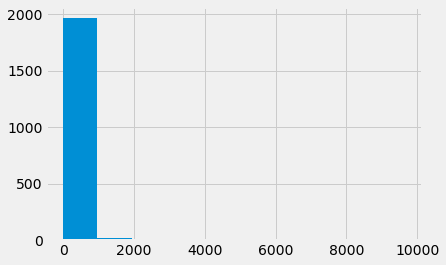

In [12]:
df_names_1880['births'].hist();

Since we have numerous data files, the following snippet combines all of these data into a single pandas `DataFrame` and adds a `year` field.

In [13]:
years = range(1880, 2015)
df_list = []
names = ['name', 'sex', 'births']

for year in years:
    path = 'https://raw.githubusercontent.com/cse44648/cse44648/master/datasets/baby-names/yob%d.txt' % year
    df_names_year = pd.read_csv(path, names=names)
    df_names_year['year'] = year
    df_list.append(df_names_year)

# Concatenate the list of DataFrames into a single DataFrame.
df_names = pd.concat(df_list, ignore_index=True)

In [14]:
# This would save the above DataFrame for future use:
#df_names.to_csv('us_baby_names.csv', index=False)

# The code above may take a while to run. Alternatively, you can load the local copy of the dataset as below:
#df_names = pd.read_csv("../data/us_baby_names.csv")

In [15]:
df_names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


We can now perform several types of aggregation. For example, let's create a new `DataFrame` containing the total number of births per year, split by sex.

In [16]:
df_total_births = df_names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

In [17]:
df_total_births.head()

sex,F,M
year,,
1880,90992,110490
1881,91953,100743
1882,107848,113686
1883,112318,104627
1884,129020,114443


Using the `plot()` function, we can very quickly draw a figure to illustrate this DataFrame.

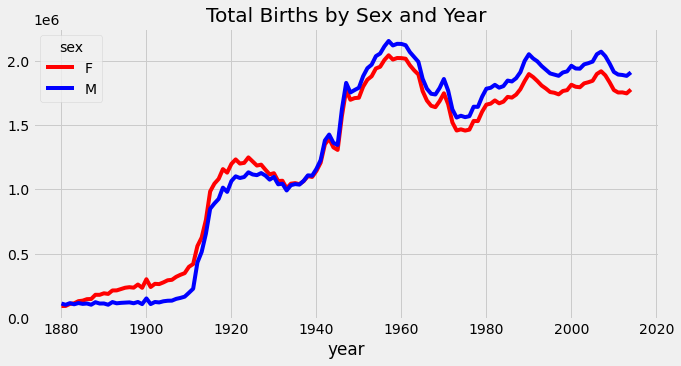

In [18]:
df_total_births.plot(figsize=(10, 5),
                     title="Total Births by Sex and Year",
                     color=['red', 'blue']);

### Interactive plot using Plot.ly

To ensure it's available, we can install Plotly from inside our notebook:

In [19]:
!pip install -q chart-studio plotly

In [20]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [21]:
data = [
    go.Scatter(x=df_total_births.index,
               y=df_total_births['F'],
               name='F'
    ),
    go.Scatter(x=df_total_births.index,
               y=df_total_births['M'],
               name='M'
    )
]

# Edit the layout.
layout = dict(title="U.S. Baby Names Over Time",
              xaxis=dict(title="Year"),
              yaxis=dict(title="Number of Births"))

fig = dict(data=data, layout=layout)

In [22]:
iplot(fig)

Now suppose we would like to analyze how frequently the names _John_, _Mary_, _Pamela_, _Jason_, and _Vanessa_ occur over time.

First we redefine total_births, this time aggregating data by name rather than sex. We then retrieve the subset of names that we are interested in and plot them.

In [23]:
matplotlib.style.use('seaborn-white')

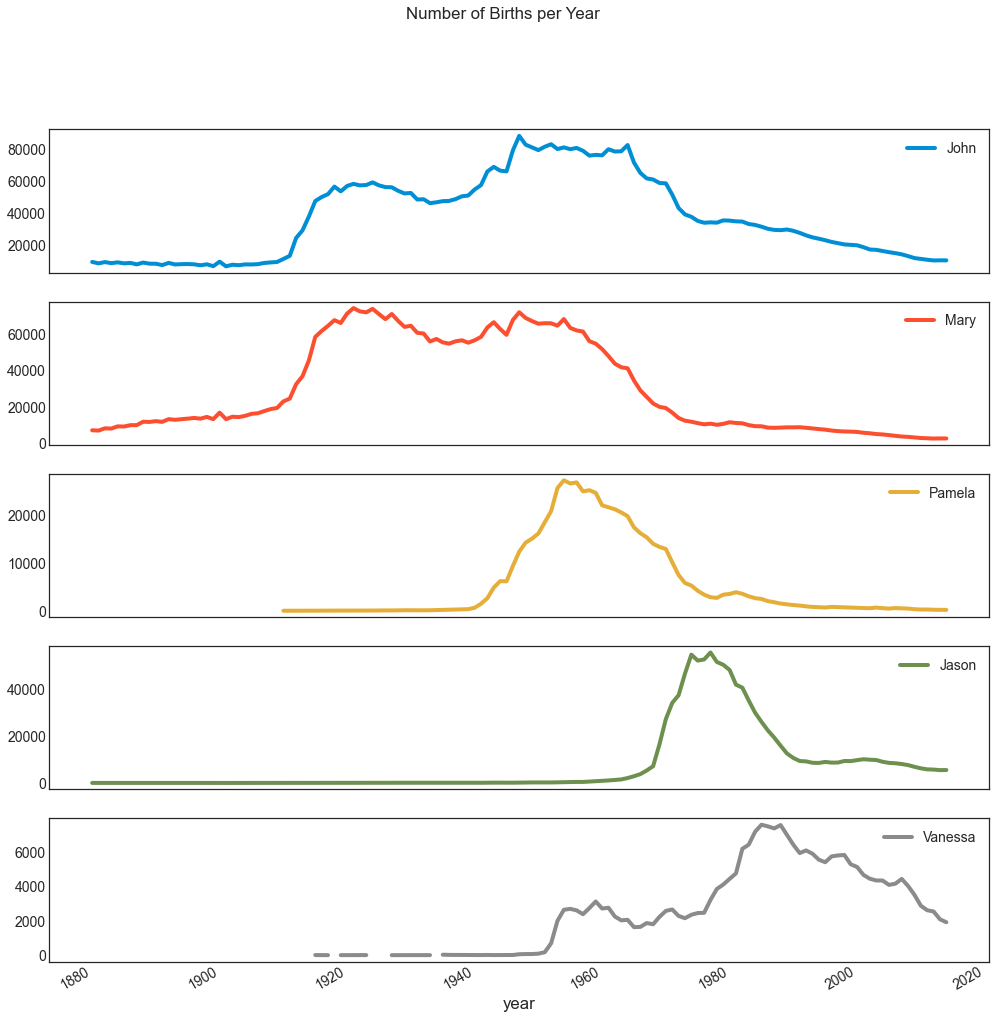

In [24]:
total_births = df_names.pivot_table('births', index='year', columns='name', aggfunc=sum)
subset = total_births[['John', 'Mary', 'Pamela', 'Jason', 'Vanessa']]
subset.plot(subplots=True, figsize=(15, 17), grid=False,
            title="Number of Births per Year");

### Gender neutral names

In [25]:
df_name = df_names[df_names['name'] == 'Rory']
df_name = df_name.pivot_table('births', index='year', columns='sex', aggfunc=sum)

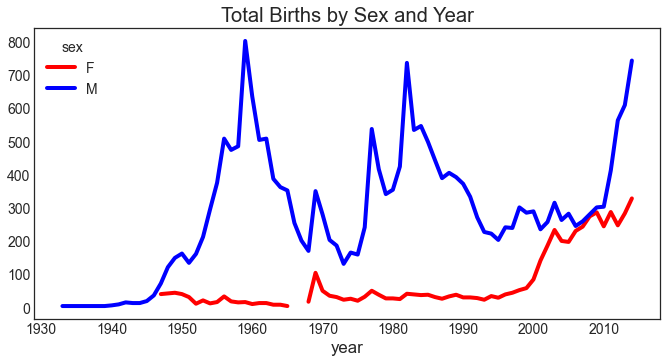

In [26]:
df_name.plot(figsize=(10, 5),
             title="Total Births by Sex and Year",
             color=['red', 'blue']);

### Most strongly gender neutral names

In [27]:
df_names_by_gender = df_names.pivot_table('births', index='name', columns='sex', aggfunc='sum')

In [28]:
df_names_by_gender = df_names_by_gender.dropna()

In [29]:
df_names_by_gender.head()

sex,F,M
name,,
Aaden,5.0,3917.0
Aadi,16.0,667.0
Aadyn,16.0,387.0
Aalijah,107.0,155.0
Aaliyah,69874.0,84.0


In [30]:
df_names_by_gender['M_F_ratio'] = df_names_by_gender['M'] / df_names_by_gender['F']

In [31]:
condition = ((df_names_by_gender['M_F_ratio'] > 0.95) &
             (df_names_by_gender['M_F_ratio'] < 1.05))
df_gender_neutral_names = df_names_by_gender[condition]
df_gender_neutral_names = df_gender_neutral_names.sort_values(by='F', ascending=False)

In [32]:
df_gender_neutral_names.head()

sex,F,M,M_F_ratio
name,,,
Kerry,48450.0,49420.0,1.020021
Kris,13437.0,13794.0,1.026568
Unknown,9295.0,9147.0,0.984077
Ivory,8408.0,8186.0,0.973597
Baby,5803.0,6037.0,1.040324


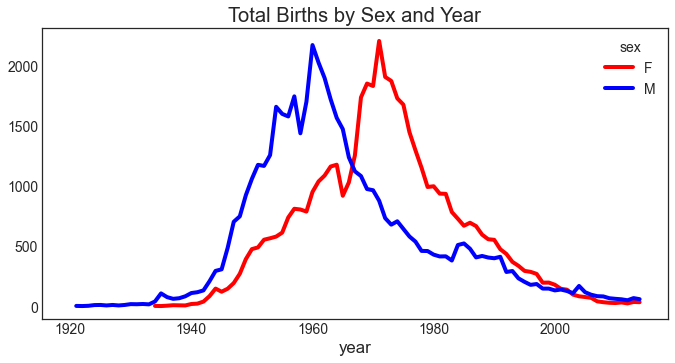

In [33]:
df_name = df_names[df_names['name'] == 'Kerry']
df_name = df_name.pivot_table('births', index='year', columns='sex', aggfunc=sum)
df_name.plot(figsize=(10, 5),
             title="Total Births by Sex and Year",
             color=['red', 'blue']);